In [1]:
pip install pandas numpy statsmodels matplotlib seaborn wordcloud beautifulsoup4 nltk scikit-learn imbalanced-learn openpyxl folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# Importing Necessary libraries

In [2]:
import pandas as pd
import numpy as np
import re

from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import matplotlib.gridspec as gridspec
import folium

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data (stopwords, punkt, wordnet)
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\knssn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\knssn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\knssn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading Data

In [3]:
# Specify the local file path
file_path = r'D:\Naren\Capstone\Old_FrontEnd\Dataset\fake_job_postings.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# Update each unique value to be enclosed in double quotes
department = ['"{}"'.format(etype) for etype in df['department'].unique()]

# Print the array with quoted values
print(", ".join(department))

"Marketing", "Success", "nan", "Sales", "ANDROIDPIT", "HR", " R&D", "Engagement", "Businessfriend.com", "Medical", "Field", "All", "Design", "Production", "ICM", "General Services", "Engineering", "IT", "Business Development", "Human Resources", "Oil & Energy", "Marketplace", "Cloud Services", "FP", "Client Services", "Operations", "Materials", "tech", "Sales and Business Development", "R&D", "Development", "Incubation Services", "Field Operations", "MKT", "Technology", "Power Plant & Energy", "Approvals Department", "Playfair Capital", "Development ", "Tech", "Software development", "Media", "Line-Up", "Management", "Squiz ", "Finance", "Financial", "Retail", "Marketing and Communications", "Research", "Connectivity", "PMO", "Product", "Student Beans Mag", "Information Technology Group", "DTVMA", "G&A", "Implementations", "OPS", "Partnership Management", "Professional Services", "Customer Care", "Account Management", "EC", "Solution Test", "Grocery Stores", "Marketing – Pame Stoixima"

In [5]:
import pandas as pd

# Example DataFrame loading, replace this with your actual DataFrame loading method
# df = pd.read_csv('your_data.csv')

# Function to generate JavaScript array variable
def generate_js_array(df):
    # Ensure all entries are treated as strings and handle NaN values
    unique_departments = ['    "{}"'.format(str(department).replace('"', '\\"')) for department in df['department'].unique()]
    # Join all the items into a single string, formatted as a JavaScript array
    js_array_content = ",\n".join(unique_departments)
    # Format into a JavaScript object with proper newlines and spacing
    js_code = f"departments: [\n{js_array_content}\n  ];"
    return js_code

# Generate the JavaScript array variable
js_code = generate_js_array(df)
print(js_code)


departments: [
    "Marketing",
    "Success",
    "nan",
    "Sales",
    "ANDROIDPIT",
    "HR",
    " R&D",
    "Engagement",
    "Businessfriend.com",
    "Medical",
    "Field",
    "All",
    "Design",
    "Production",
    "ICM",
    "General Services",
    "Engineering",
    "IT",
    "Business Development",
    "Human Resources",
    "Oil & Energy",
    "Marketplace",
    "Cloud Services",
    "FP",
    "Client Services",
    "Operations",
    "Materials",
    "tech",
    "Sales and Business Development",
    "R&D",
    "Development",
    "Incubation Services",
    "Field Operations",
    "MKT",
    "Technology",
    "Power Plant & Energy",
    "Approvals Department",
    "Playfair Capital",
    "Development ",
    "Tech",
    "Software development",
    "Media",
    "Line-Up",
    "Management",
    "Squiz ",
    "Finance",
    "Financial",
    "Retail",
    "Marketing and Communications",
    "Research",
    "Connectivity",
    "PMO",
    "Product",
    "Student Beans Mag",
 

In [23]:
# Update each unique value to be enclosed in double quotes
employment_types = ['"{}"'.format(etype) for etype in df['employment_type'].unique()]

# Print the array with quoted values
print(", ".join(employment_types))

"Other", "Full-time", "nan", "Part-time", "Contract", "Temporary"


In [24]:
# Update each unique value to be enclosed in double quotes
required_experience = ['"{}"'.format(etype) for etype in df['required_experience'].unique()]

# Print the array with quoted values
print(", ".join(required_experience))

"Internship", "Not Applicable", "nan", "Mid-Senior level", "Associate", "Entry level", "Executive", "Director"


In [25]:
# Update each unique value to be enclosed in double quotes
required_education = ['"{}"'.format(etype) for etype in df['required_education'].unique()]

# Print the array with quoted values
print(", ".join(required_education))

"nan", "Bachelor's Degree", "Master's Degree", "High School or equivalent", "Unspecified", "Some College Coursework Completed", "Vocational", "Certification", "Associate Degree", "Professional", "Doctorate", "Some High School Coursework", "Vocational - Degree", "Vocational - HS Diploma"


# Exploratory Data Analysis(EDA)

In [4]:
df.shape

(17880, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
# statististics of numeric data
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


The describe() function reveals that our dataset contains four numerical columns: job_id, telecommuting, has_company_logo, and has_questions. These columns can be removed as they are irrelevant for text classification tasks. The fraudulent column, another numerical feature, will serve as our target variable for model training and prediction.

## Information on Missing Values

In [7]:
# Checking for null values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<Figure size 1400x800 with 0 Axes>

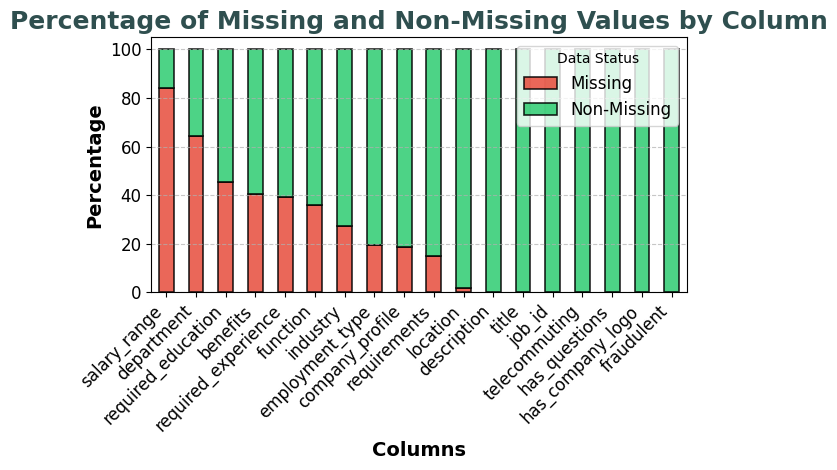

In [8]:
# Calculate missing and non-missing values
missing_data = df.isnull().mean() * 100
non_missing_data = 100 - missing_data

# Creating a DataFrame for stacked plotting
missing_summary = pd.DataFrame({
    'Missing': missing_data,
    'Non-Missing': non_missing_data
})

# Sorting by missing percentage for a more structured plot
missing_summary = missing_summary.sort_values(by='Missing', ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
missing_summary.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'], alpha=0.85, edgecolor='k', linewidth=1.2)

# Title and labels
plt.title("Percentage of Missing and Non-Missing Values by Column", fontsize=18, weight='bold', color='darkslategray')
plt.xlabel("Columns", fontsize=14, weight='bold')
plt.ylabel("Percentage", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Customizing the legend
plt.legend(title="Data Status", fontsize=12, loc='upper right')

# Grid and layout adjustments
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Z-Test for proportions** is used to compare the proportion of missing values

Z-test for proportions is based on
* Null Hypothesis (H₀): The missing value proportion is same.
* Alternative Hypothesis (H₁): The missing value proportion is different.

The **Z-test** compares the proportions of missing values between fraudulent and non-fraudulent job posts.

If the **p-value** is below the threshold, we conclude that the difference in missing values is statistically significant for that column.

**Reference:**  Geeksforgeeks (2024, August 14). Z-test : Formula, types, examples. GeeksforGeeks. https://www.geeksforgeeks.org/z-test/

In [9]:
#Substituting null values with Unknown
df_na =df.fillna('Unknown')

real=df_na[df_na.fraudulent==0]
fake=df_na[df_na.fraudulent==1]

# Calculating the percentage of 'Unknown' values for each column in real and fake datasets
real_unknown_rate = (real == 'Unknown').mean() * 100
fake_unknown_rate = (fake == 'Unknown').mean() * 100

# Creating a DataFrame to store unknown rates and z-test results
na_rates = pd.DataFrame({
    'column': real_unknown_rate.index,
    'Real Unknown Rate': real_unknown_rate.values,
    'Fake Unknown Rate': fake_unknown_rate.values,
    'zstat': np.nan,
    'p_value': np.nan,
    'significant_diff': False
})

# Performing Z-test for each column
for col in real.columns:
    counts = np.array([len(real[real[col] == 'Unknown']), len(fake[fake[col] == 'Unknown'])])
    nobs = np.array([len(real[col]), len(fake[col])])

    # Performing Z-test if there are 'Unknown' values
    if counts.sum() != 0:
        zstat, p_value = proportions_ztest(count=counts, nobs=nobs, alternative='two-sided')
        na_rates.loc[na_rates['column'] == col, 'zstat'] = zstat
        na_rates.loc[na_rates['column'] == col, 'p_value'] = p_value
        na_rates.loc[na_rates['column'] == col, 'significant_diff'] = p_value < 0.005

# Displaing the final DataFrame with unknown rates, z-stats, p-values, and significance
na_rates

,column,Real Unknown Rate,Fake Unknown Rate,zstat,p_value,significant_diff
0,job_id,0.000000,0.000000,NaN,NaN,False
1,title,0.000000,0.000000,NaN,NaN,False
2,location,1.921947,2.193995,-0.566910,5.707753e-01,False
3,department,64.752557,61.316397,2.062507,3.915951e-02,False
4,salary_range,84.453979,74.249423,7.982358,1.435640e-15,True
5,company_profile,15.992712,67.782910,-38.286984,0.000000e+00,True
6,description,0.000000,0.115473,-4.432578,9.311288e-06,True
7,requirements,14.940637,17.782910,-2.280125,2.260028e-02,False
8,benefits,40.249207,42.032333,-1.043419,2.967544e-01,False
9,telecommuting,0.000000,0.000000,NaN,NaN,False


* **Significant Differences (p-value < 0.005):**
 * Salary Range: Real: 84.45%, Fake: 74.25% (Fake posts have fewer missing).
 * Company Profile: Real: 15.99%, Fake: 67.78% (Fake posts have much more missing).
 * Description: Real: 0%, Fake: 0.12% (Small, but significant difference).
 * Employment Type: Real: 18.98%, Fake: 27.83% (More missing in fake posts).
 * Required Experience: Real: 38.88%, Fake: 50.23% (More missing in fake posts).
 * Required Education: Real: 44.99%, Fake: 52.08% (More missing in fake posts).
 * Industry: Real: 27.20%, Fake: 31.76% (Slightly more missing in fake posts).
* **No Significant Differences (p-value > 0.005):**
 * Location: Real: 1.92%, Fake: 2.19%.
 * Requirements: Real: 14.94%, Fake: 17.78%.
 * Benefits: Real: 40.25%, Fake: 42.03%.
 * Function: Real: 35.96%, Fake: 38.91%.
* **No Missing Data in both real and fake posts:** Job ID, Title, Telecommuting, Has Company Logo, Has Questions, Fraudulent.

## Comparison of 'Unknown' Rates in Real vs. Fake Job Postings

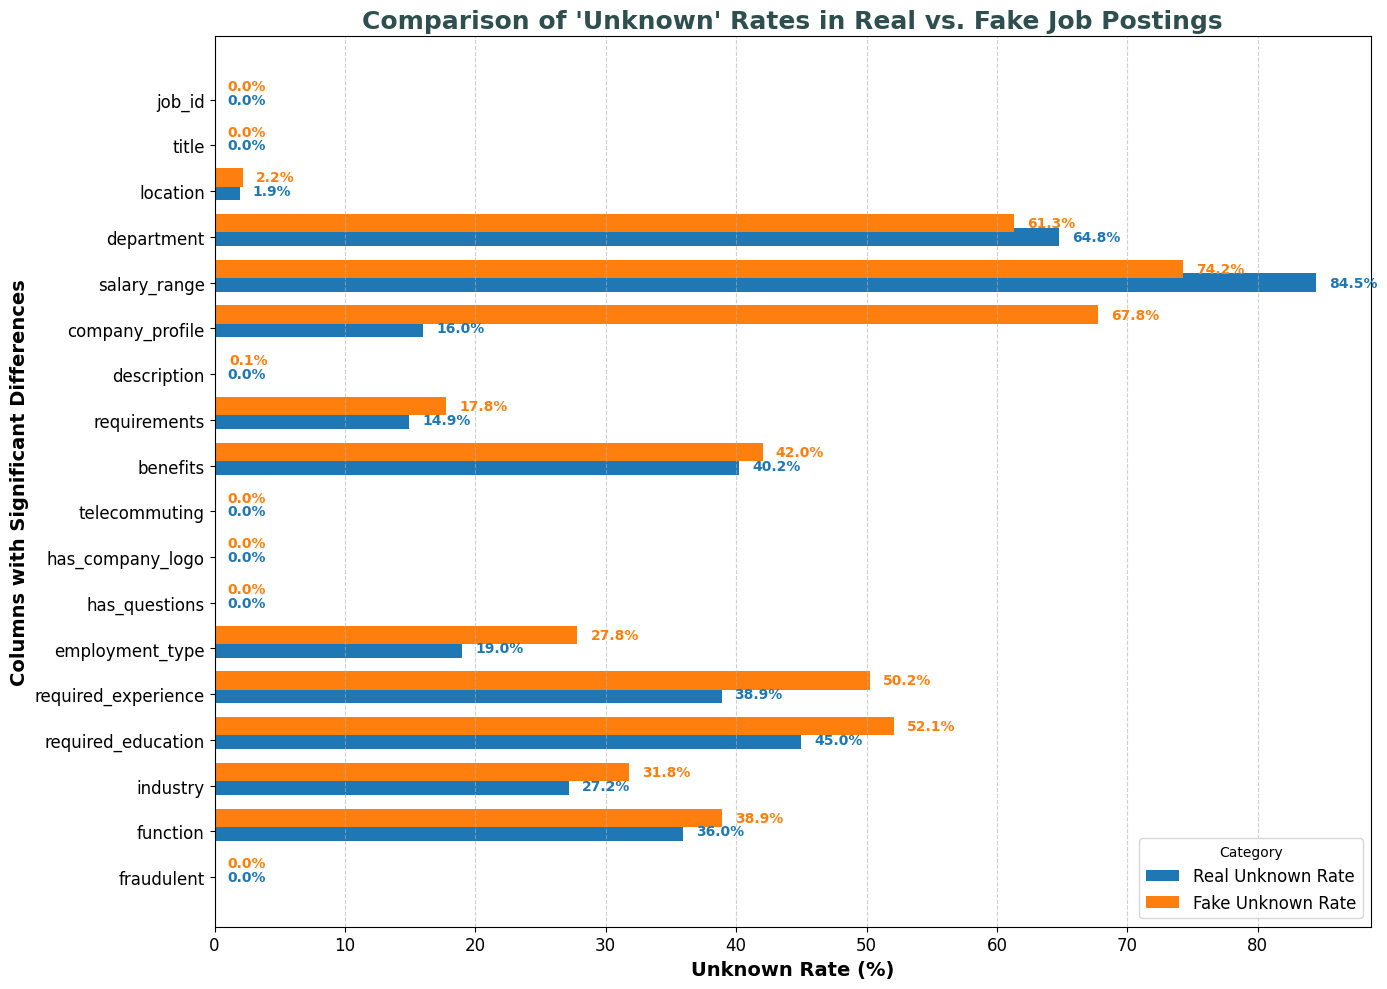

In [10]:
# Custom colors for real and fake categories
real_color = '#1f77b4'  # Blue for real job postings
fake_color = '#ff7f0e'  # Yellow-orange for fake job postings

# Plotting
plt.figure(figsize=(14, 10))

# Real bars - plotted first
bars_real = plt.barh(na_rates['column'], na_rates['Real Unknown Rate'],
                     color=real_color, label='Real Unknown Rate', height=0.4)

# Fake bars - plotted below the real bars with an offset on the y-axis
bars_fake = plt.barh([i - 0.3 for i in range(len(na_rates['column']))],
                     na_rates['Fake Unknown Rate'], color=fake_color,
                     label='Fake Unknown Rate', height=0.4)

# Adding the exact percentages as annotations
for i, (real, fake) in enumerate(zip(na_rates['Real Unknown Rate'], na_rates['Fake Unknown Rate'])):
    plt.text(real + 1, i, f"{real:.1f}%", va='center', ha='left', color=real_color, fontweight='bold')
    plt.text(fake + 1, i - 0.3, f"{fake:.1f}%", va='center', ha='left', color=fake_color, fontweight='bold')

# Title and labels
plt.title("Comparison of 'Unknown' Rates in Real vs. Fake Job Postings", fontsize=18, weight='bold', color='darkslategray')
plt.xlabel("Unknown Rate (%)", fontsize=14, weight='bold')
plt.ylabel("Columns with Significant Differences", fontsize=14, weight='bold')

# Customizing ticks and legend
plt.xticks(fontsize=12)
plt.yticks(range(len(na_rates['column'])), na_rates['column'], fontsize=12)
plt.legend(title="Category", loc='lower right', fontsize=12)  # Changed to bottom right
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rate at the top

# Adding gridlines for clarity
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


## Distribution of Categorical Features by Fraudulent Label

C:\Users\knssn\AppData\Local\Temp\ipykernel_15744\3574429222.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ylabels, fontsize=10)
C:\Users\knssn\AppData\Local\Temp\ipykernel_15744\3574429222.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ylabels, fontsize=10)
C:\Users\knssn\AppData\Local\Temp\ipykernel_15744\3574429222.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ylabels, fontsize=10)
C:\Users\knssn\AppData\Local\Temp\ipykernel_15744\3574429222.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


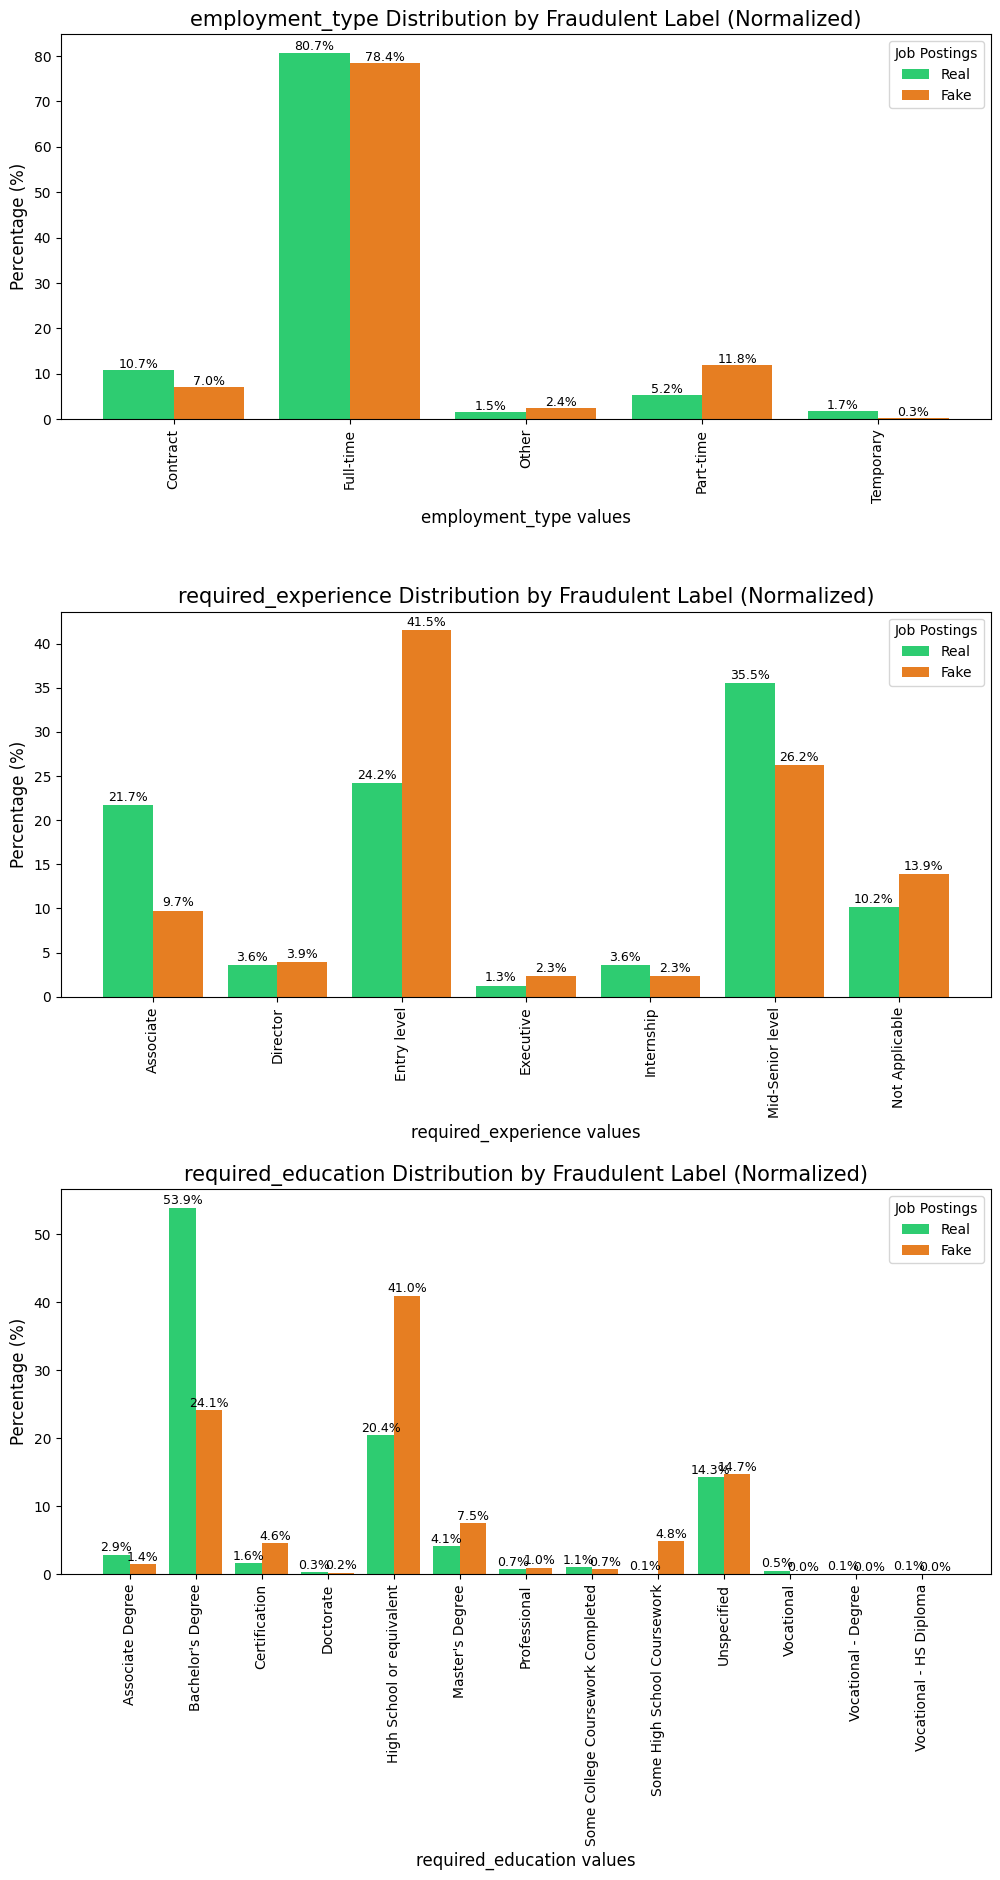

In [11]:
# List of categorical columns to plot
cat_cols = ["employment_type", "required_experience", "required_education"]

# Set up grid layout for subplots
grid = gridspec.GridSpec(len(cat_cols), 1, wspace=0.4, hspace=0.5)
plt.figure(figsize=(12, 20))

# Loop through each categorical column
for n, col in enumerate(cat_cols):
    ax = plt.subplot(grid[n])

    # Calculate percentages for each category value within each fraudulent label
    value_counts = df.groupby(['fraudulent', col]).size().unstack(fill_value=0)
    percentages = value_counts.div(value_counts.sum(axis=1), axis=0) * 100

    # Define bar width and position offsets for side-by-side plotting
    width = 0.4
    real_positions = np.arange(len(percentages.columns)) - width / 2
    fake_positions = np.arange(len(percentages.columns)) + width / 2

    # Plotting side-by-side bars for real and fake job postings
    ax.bar(real_positions, percentages.loc[0], width=width, label='Real', color='#2ecc71')
    ax.bar(fake_positions, percentages.loc[1], width=width, label='Fake', color='#e67e22')

    # Set plot labels and title
    ax.set_ylabel('Percentage (%)', fontsize=12)
    ax.set_title(f'{col} Distribution by Fraudulent Label (Normalized)', fontsize=15)
    ax.set_xlabel(f'{col} values', fontsize=12)
    ax.set_xticks(np.arange(len(percentages.columns)))
    ax.set_xticklabels(percentages.columns, fontsize=10, rotation=90)
    ylabels = ax.get_yticklabels()
    ax.set_yticklabels(ylabels, fontsize=10)

    # Adding percentage labels on each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.5,
                f'{height:.1f}%',
                ha='center', fontsize=9)

    # Customize the legend
    ax.legend(["Real", "Fake"], title="Job Postings", fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


## Percentage Distribution of Job Postings by Department

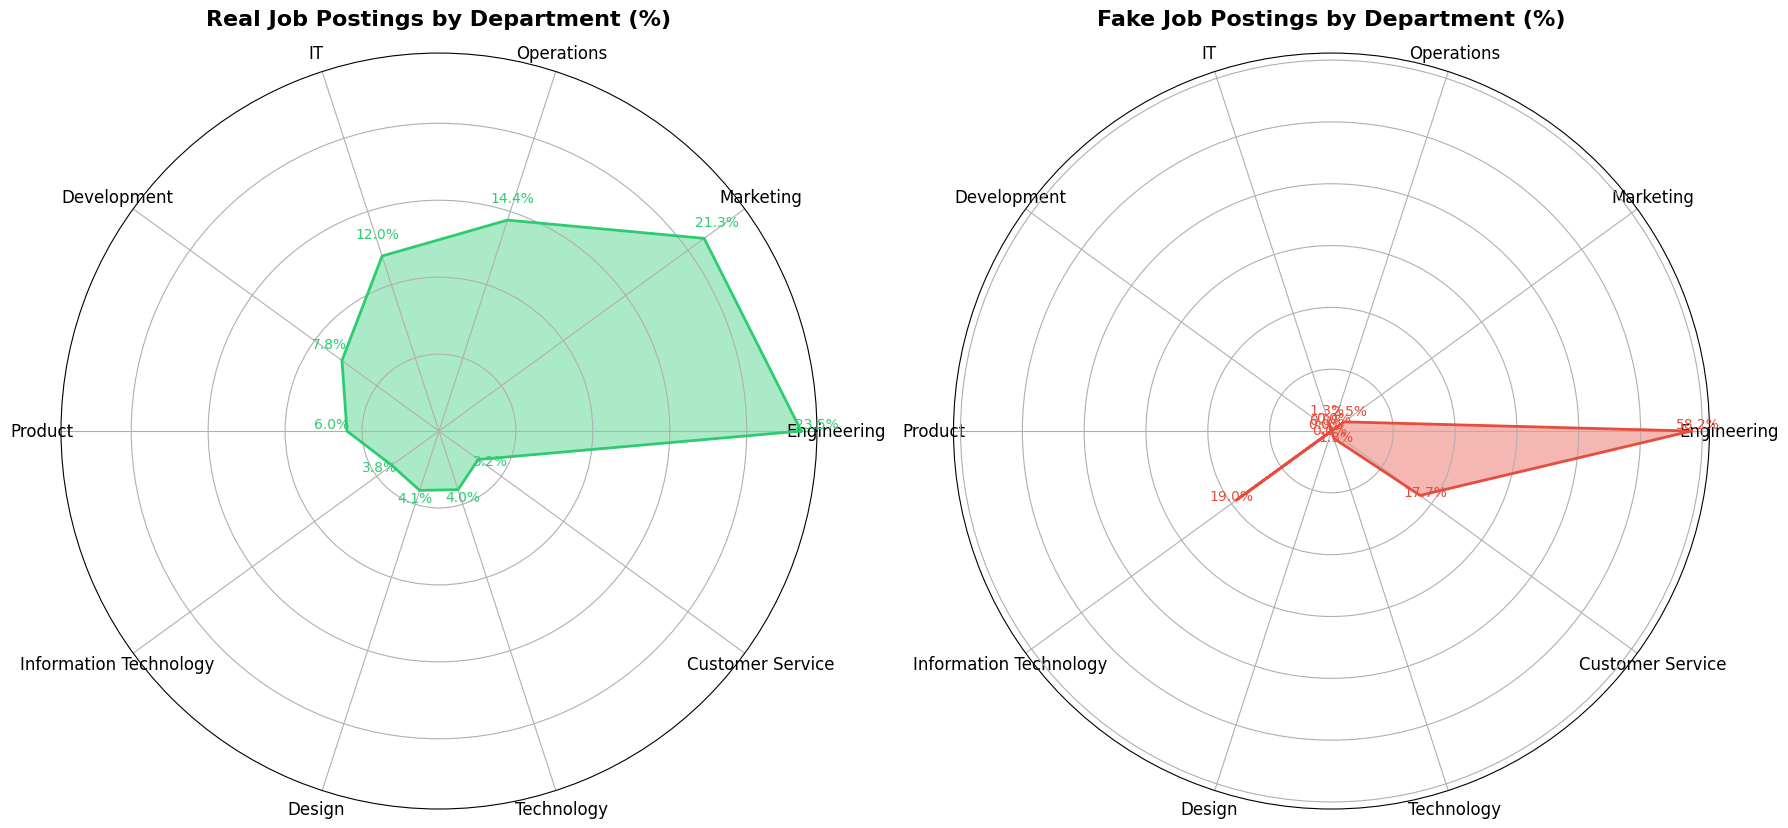

In [12]:
# Calculate the count of real and fake job postings for each department
department_counts = df.groupby(['department', 'fraudulent']).size().unstack(fill_value=0)

# Find the department with the most job postings and exclude it
total_counts = department_counts.sum(axis=1)
top_department = total_counts.idxmax()
department_counts_excluded = department_counts.drop(top_department)

# Sort by total count and select the next top 10 departments (excluding the top)
top_departments_excluded = department_counts_excluded.sum(axis=1).sort_values(ascending=False).head(10).index
department_counts_top_excluded = department_counts_excluded.loc[top_departments_excluded]

# Calculate total number of real and fake postings
total_real = department_counts_top_excluded[0].sum()
total_fake = department_counts_top_excluded[1].sum()

# Calculate percentages for each department relative to total real and fake postings
real_percentages = (department_counts_top_excluded[0] / total_real) * 100
fake_percentages = (department_counts_top_excluded[1] / total_fake) * 100

# Prepare data for plotting
labels = department_counts_top_excluded.index
real_data = real_percentages.values
fake_data = fake_percentages.values
num_vars = len(labels)

# Compute angle for each department on the plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
# Repeat the first angle to close the plot
angles += angles[:1]
real_data = np.concatenate((real_data, [real_data[0]]))
fake_data = np.concatenate((fake_data, [fake_data[0]]))

# Initialize two subplots for real and fake job postings
fig, axs = plt.subplots(1, 2, figsize=(18, 10), subplot_kw=dict(polar=True))

# Plot for real job postings
axs[0].fill(angles, real_data, color='#2ecc71', alpha=0.4, label='Real Job Postings (%)')
axs[0].plot(angles, real_data, color='#2ecc71', linewidth=2)
axs[0].set_yticklabels([])
axs[0].set_xticks(angles[:-1])
axs[0].set_xticklabels(labels, fontsize=12)
axs[0].set_title("Real Job Postings by Department (%)", size=16, weight='bold', pad=20)

# Annotate real job postings with percentage values
for i, value in enumerate(real_data[:-1]):  # Exclude the repeated first angle point
    axs[0].text(angles[i], value + 1, f"{value:.1f}%", ha='center', va='bottom', fontsize=10, color='#2ecc71')

# Plot for fake job postings
axs[1].fill(angles, fake_data, color='#e74c3c', alpha=0.4, label='Fake Job Postings (%)')
axs[1].plot(angles, fake_data, color='#e74c3c', linewidth=2)
axs[1].set_yticklabels([])
axs[1].set_xticks(angles[:-1])
axs[1].set_xticklabels(labels, fontsize=12)
axs[1].set_title("Fake Job Postings by Department (%)", size=16, weight='bold', pad=20)

# Annotate fake job postings with percentage values
for i, value in enumerate(fake_data[:-1]):  # Exclude the repeated first angle point
    axs[1].text(angles[i], value + 1, f"{value:.1f}%", ha='center', va='bottom', fontsize=10, color='#e74c3c')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [13]:
#filling na with empty space
df.fillna(' ', inplace=True)

## Number of unique categories for each categorical feature in the dataset

In [14]:
# Printing the number of unique categories for each categorical feature in the dataset
print("data Set:")
for col_name in df.columns:
    if df[col_name].dtype == 'object':
        unique_cat = df[col_name].nunique()
        print(f"Feature '{col_name}' has {unique_cat} unique categories.")

data Set:
Feature 'title' has 11231 unique categories.
Feature 'location' has 3106 unique categories.
Feature 'department' has 1337 unique categories.
Feature 'salary_range' has 875 unique categories.
Feature 'company_profile' has 1710 unique categories.
Feature 'description' has 14802 unique categories.
Feature 'requirements' has 11968 unique categories.
Feature 'benefits' has 6205 unique categories.
Feature 'employment_type' has 6 unique categories.
Feature 'required_experience' has 8 unique categories.
Feature 'required_education' has 14 unique categories.
Feature 'industry' has 132 unique categories.
Feature 'function' has 38 unique categories.


## Text Length Distributions by Fraudulent Label (Violin plot)

C:\Users\knssn\AppData\Local\Temp\ipykernel_15744\3645953090.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraudulent', y='description_length', data=df_vplot, palette='coolwarm')
C:\Users\knssn\AppData\Local\Temp\ipykernel_15744\3645953090.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraudulent', y='requirements_length', data=df_vplot, palette='coolwarm')
C:\Users\knssn\AppData\Local\Temp\ipykernel_15744\3645953090.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraudulent', y='company_profile_length', d

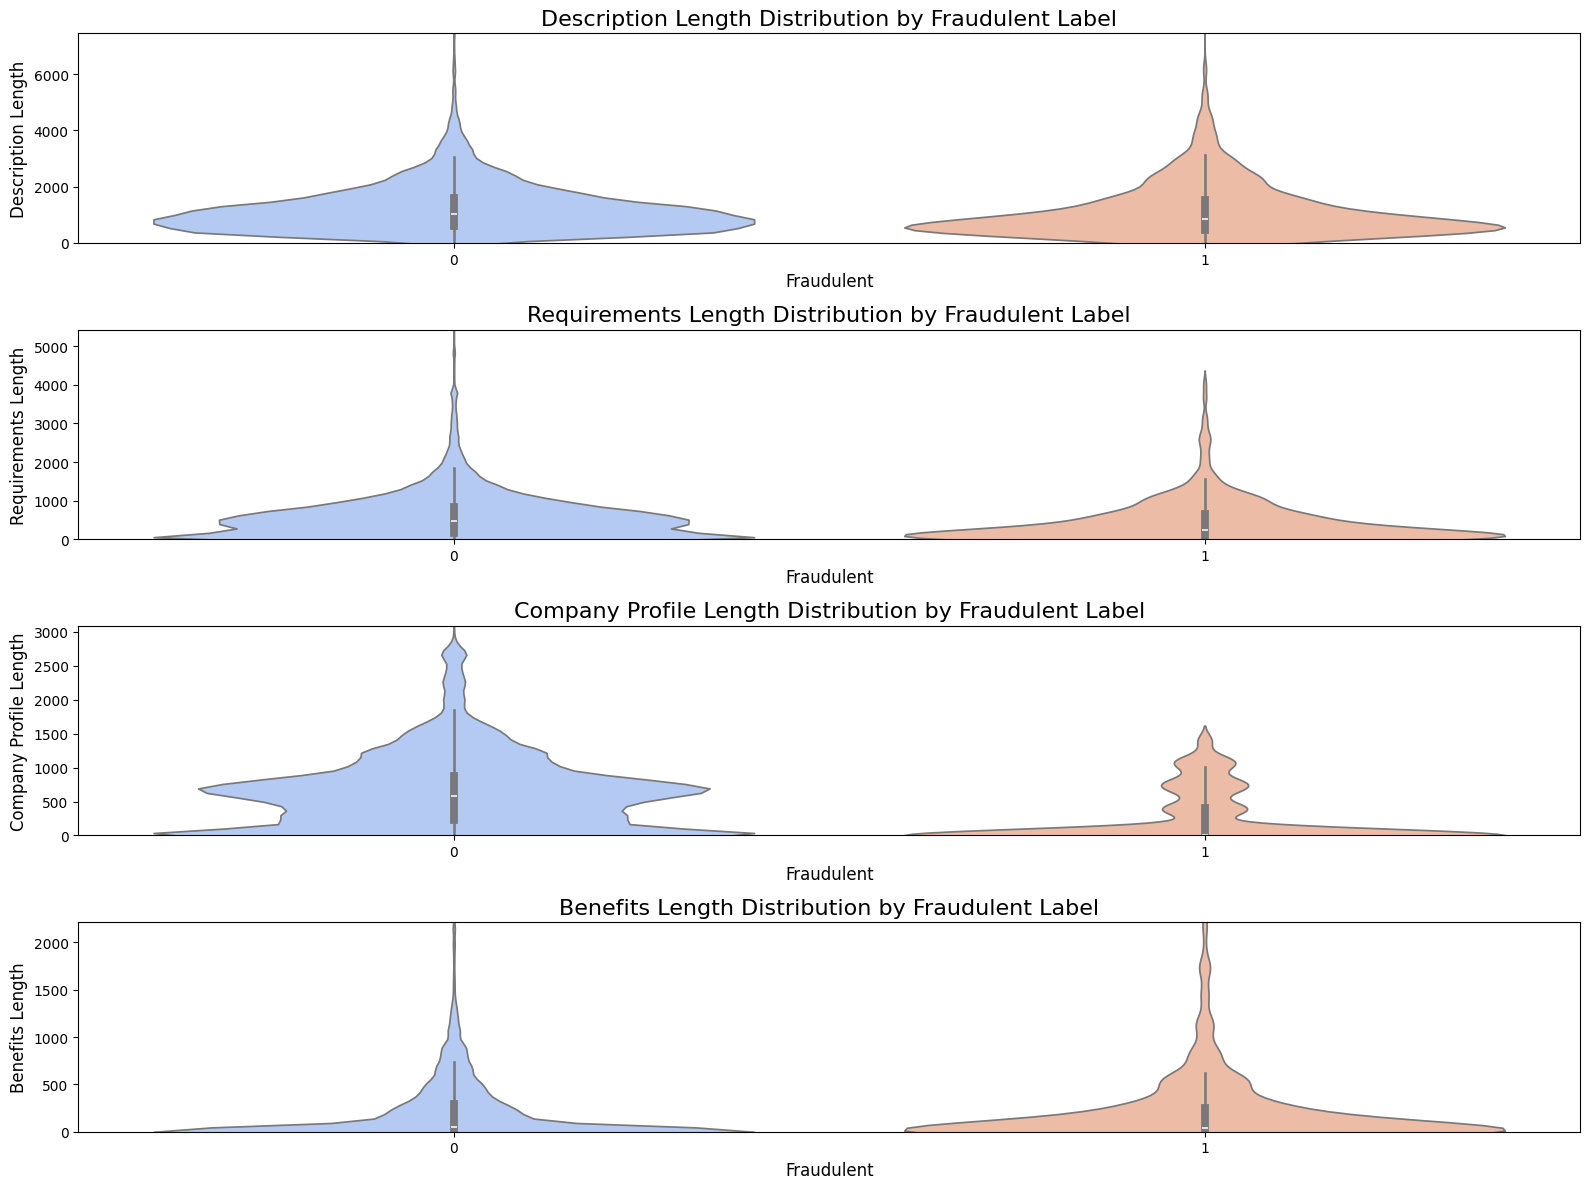

In [15]:
# Creating a copy of df
df_vplot = df.copy()

# Creating new columns for text length analysis
df_vplot['description_length'] = df_vplot['description'].apply(lambda x: len(str(x)))
df_vplot['requirements_length'] = df_vplot['requirements'].apply(lambda x: len(str(x)))
df_vplot['company_profile_length'] = df_vplot['company_profile'].apply(lambda x: len(str(x)))
df_vplot['benefits_length'] = df_vplot['benefits'].apply(lambda x: len(str(x)))

# Plotting the distributions of text lengths
plt.figure(figsize=(16, 12))

# Description Length
plt.subplot(4, 1, 1)
sns.violinplot(x='fraudulent', y='description_length', data=df_vplot, palette='coolwarm')
plt.title("Description Length Distribution by Fraudulent Label", fontsize=16)
plt.xlabel("Fraudulent", fontsize=12)
plt.ylabel("Description Length", fontsize=12)
plt.ylim(0, df_vplot['description_length'].max() / 2)  # Reducing y-axis by half

# Requirements Length
plt.subplot(4, 1, 2)
sns.violinplot(x='fraudulent', y='requirements_length', data=df_vplot, palette='coolwarm')
plt.title("Requirements Length Distribution by Fraudulent Label", fontsize=16)
plt.xlabel("Fraudulent", fontsize=12)
plt.ylabel("Requirements Length", fontsize=12)
plt.ylim(0, df_vplot['requirements_length'].max() / 2)  # Reducing y-axis by half

# Company Profile Length
plt.subplot(4, 1, 3)
sns.violinplot(x='fraudulent', y='company_profile_length', data=df_vplot, palette='coolwarm')
plt.title("Company Profile Length Distribution by Fraudulent Label", fontsize=16)
plt.xlabel("Fraudulent", fontsize=12)
plt.ylabel("Company Profile Length", fontsize=12)
plt.ylim(0, df_vplot['company_profile_length'].max() / 2)  # Reducing y-axis by half

# Benefits Length
plt.subplot(4, 1, 4)
sns.violinplot(x='fraudulent', y='benefits_length', data=df_vplot, palette='coolwarm')
plt.title("Benefits Length Distribution by Fraudulent Label", fontsize=16)
plt.xlabel("Fraudulent", fontsize=12)
plt.ylabel("Benefits Length", fontsize=12)
plt.ylim(0, df_vplot['benefits_length'].max() / 2)  # Reducing y-axis by half

# Adjust layout
plt.tight_layout()
plt.show()


## Text Length Distributions by Fraudulent Label (kde plot)

C:\Users\knssn\AppData\Local\Temp\ipykernel_15744\450746398.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_kde[df_kde['fraudulent'] == 0]['description_length'], label='Real', color='#2ecc71', shade=True)
C:\Users\knssn\AppData\Local\Temp\ipykernel_15744\450746398.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_kde[df_kde['fraudulent'] == 1]['description_length'], label='Fake', color='#e67e22', shade=True)
C:\Users\knssn\AppData\Local\Temp\ipykernel_15744\450746398.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_kde[df_kde['fraudulent'] == 0]['requirements_length'], label='Real', color='#2ecc71', 

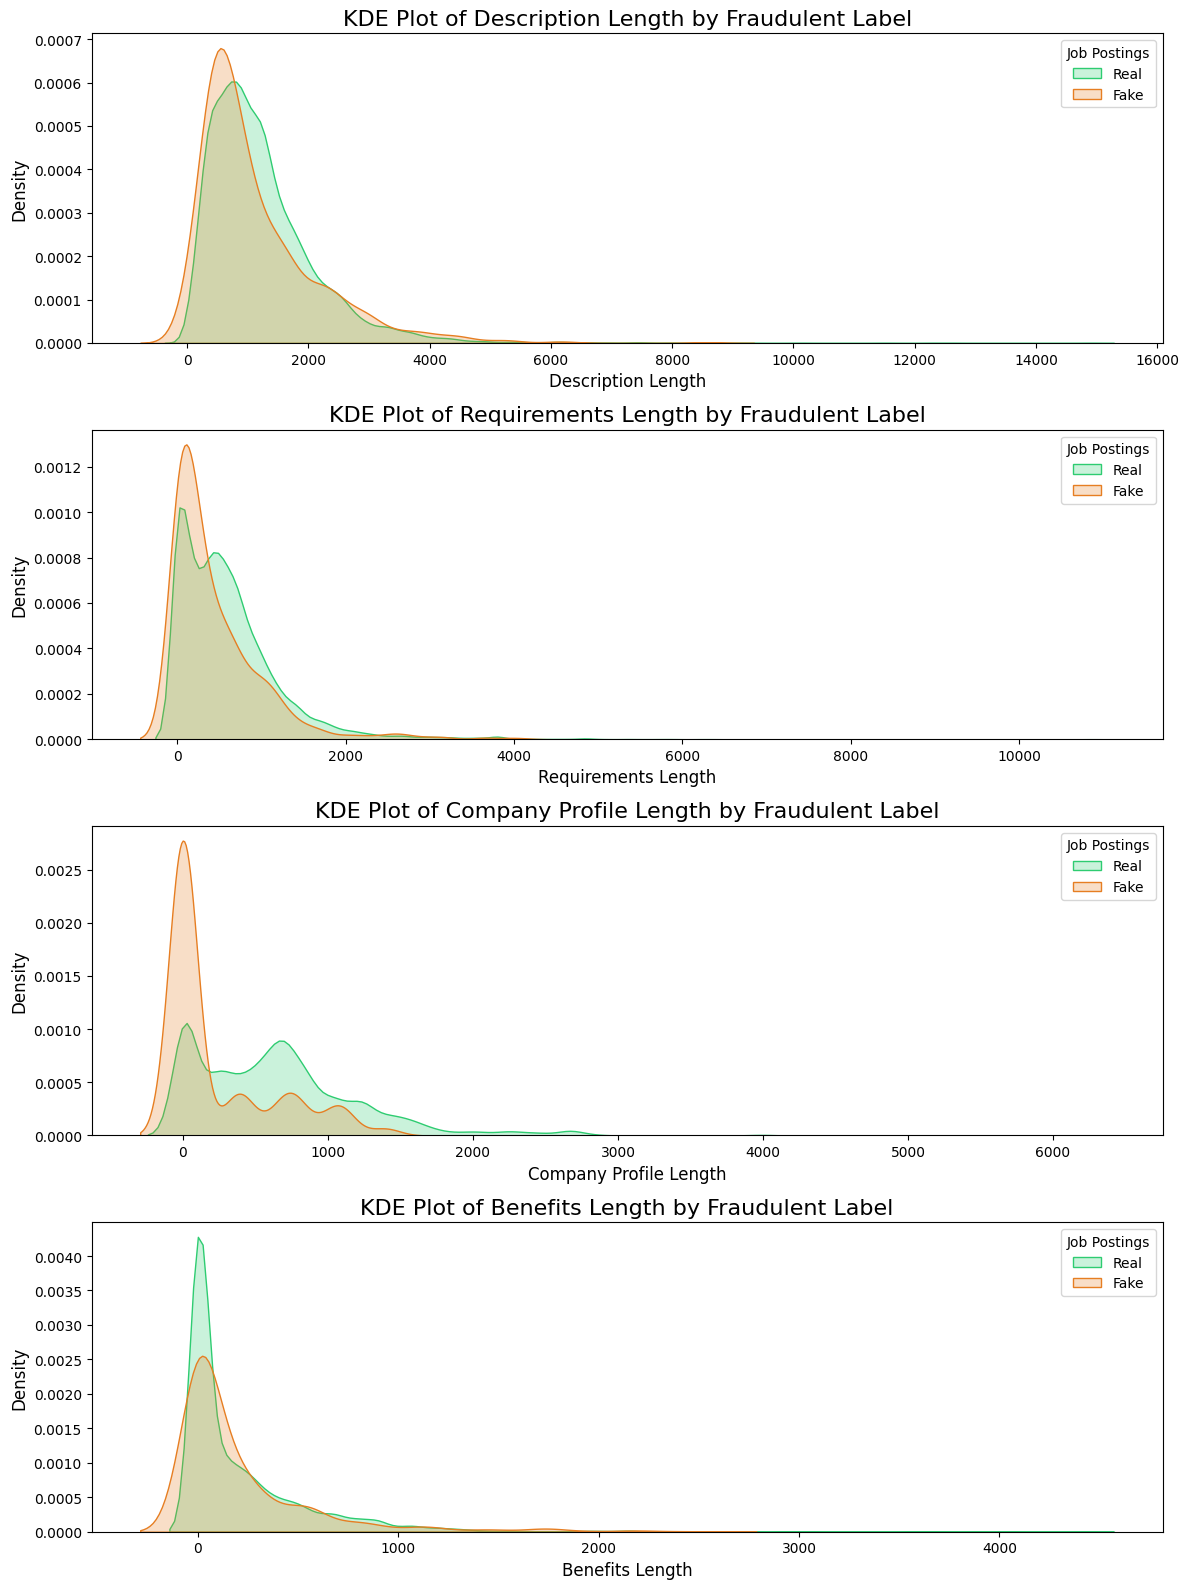

In [16]:
# Create a copy of the DataFrame for visualization
df_kde = df.copy()

# Calculate text lengths in the copied DataFrame
df_kde['description_length'] = df_kde['description'].apply(lambda x: len(str(x)))
df_kde['requirements_length'] = df_kde['requirements'].apply(lambda x: len(str(x)))
df_kde['company_profile_length'] = df_kde['company_profile'].apply(lambda x: len(str(x)))
df_kde['benefits_length'] = df_kde['benefits'].apply(lambda x: len(str(x)))

# Set up the figure with a 4x1 grid layout for KDE plots
plt.figure(figsize=(12, 16))

# KDE Plot for Description Length
plt.subplot(4, 1, 1)
sns.kdeplot(df_kde[df_kde['fraudulent'] == 0]['description_length'], label='Real', color='#2ecc71', shade=True)
sns.kdeplot(df_kde[df_kde['fraudulent'] == 1]['description_length'], label='Fake', color='#e67e22', shade=True)
plt.title("KDE Plot of Description Length by Fraudulent Label", fontsize=16)
plt.xlabel("Description Length", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Job Postings")

# KDE Plot for Requirements Length
plt.subplot(4, 1, 2)
sns.kdeplot(df_kde[df_kde['fraudulent'] == 0]['requirements_length'], label='Real', color='#2ecc71', shade=True)
sns.kdeplot(df_kde[df_kde['fraudulent'] == 1]['requirements_length'], label='Fake', color='#e67e22', shade=True)
plt.title("KDE Plot of Requirements Length by Fraudulent Label", fontsize=16)
plt.xlabel("Requirements Length", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Job Postings")

# KDE Plot for Company Profile Length
plt.subplot(4, 1, 3)
sns.kdeplot(df_kde[df_kde['fraudulent'] == 0]['company_profile_length'], label='Real', color='#2ecc71', shade=True)
sns.kdeplot(df_kde[df_kde['fraudulent'] == 1]['company_profile_length'], label='Fake', color='#e67e22', shade=True)
plt.title("KDE Plot of Company Profile Length by Fraudulent Label", fontsize=16)
plt.xlabel("Company Profile Length", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Job Postings")

# KDE Plot for Benefits Length
plt.subplot(4, 1, 4)
sns.kdeplot(df_kde[df_kde['fraudulent'] == 0]['benefits_length'], label='Real', color='#2ecc71', shade=True)
sns.kdeplot(df_kde[df_kde['fraudulent'] == 1]['benefits_length'], label='Fake', color='#e67e22', shade=True)
plt.title("KDE Plot of Benefits Length by Fraudulent Label", fontsize=16)
plt.xlabel("Benefits Length", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Job Postings")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## Binary Feature Analysis: Impact on Fraudulent Job Postings

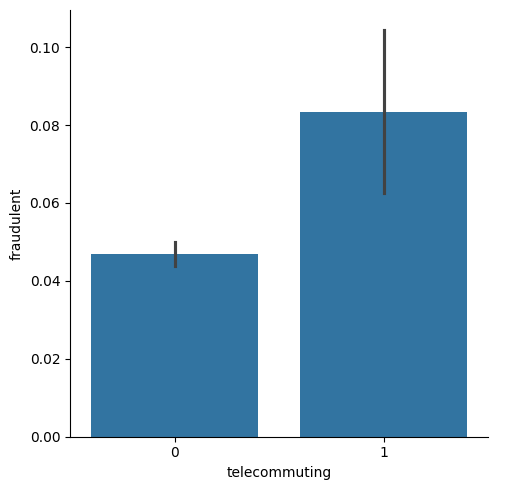

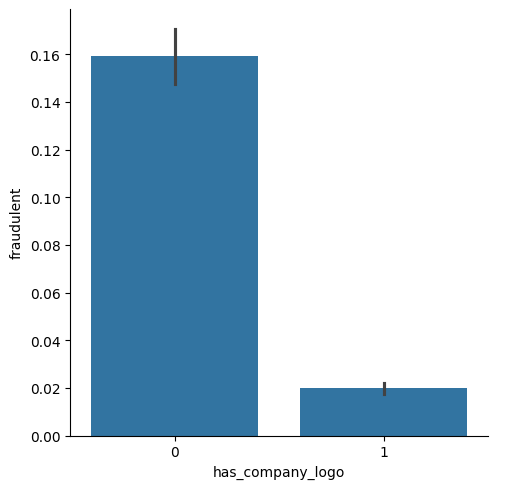

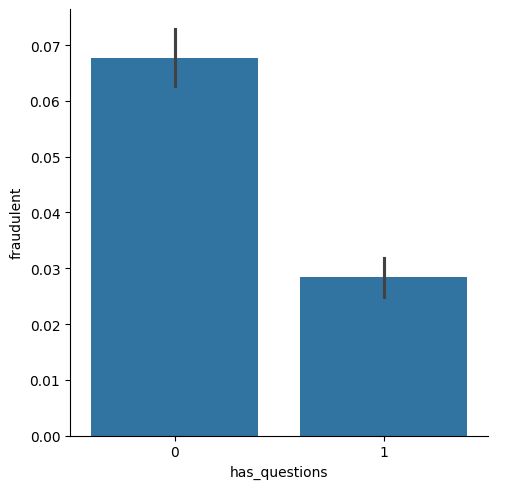

In [17]:
#subsetting fake and real data
fake=df[df.fraudulent==1]
#fake
real = df[df.fraudulent==0]

#categorical plots to cheeck relationship of binary features with fradulent transaction
sns.catplot(data=df,y='fraudulent', x='telecommuting', kind='bar')
sns.catplot(data=df, y='fraudulent', x='has_company_logo', kind='bar')
sns.catplot(data=df, y='fraudulent', x='has_questions', kind='bar')

## Geographic Analysis of Job Postings: Non-Fraudulent vs. Fraudulent

In [18]:
# File path for your Excel file
file_path = r'D:\Naren\Capstone\countries.xlsx'

# Step 1: Load the dataset as an Excel file into a DataFrame
countries_data = pd.read_excel(file_path)

# Step 2: Convert the DataFrame to CSV format (optional, for further processing if needed)
csv_data = countries_data.to_csv(index=False)

# Step 3: Reload the CSV data into another DataFrame (to simulate handling in different formats)
from io import StringIO
csv_buffer = StringIO(csv_data)
countries_data = pd.read_csv(csv_buffer)

# Display the first few rows of the DataFrame
countries_data.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


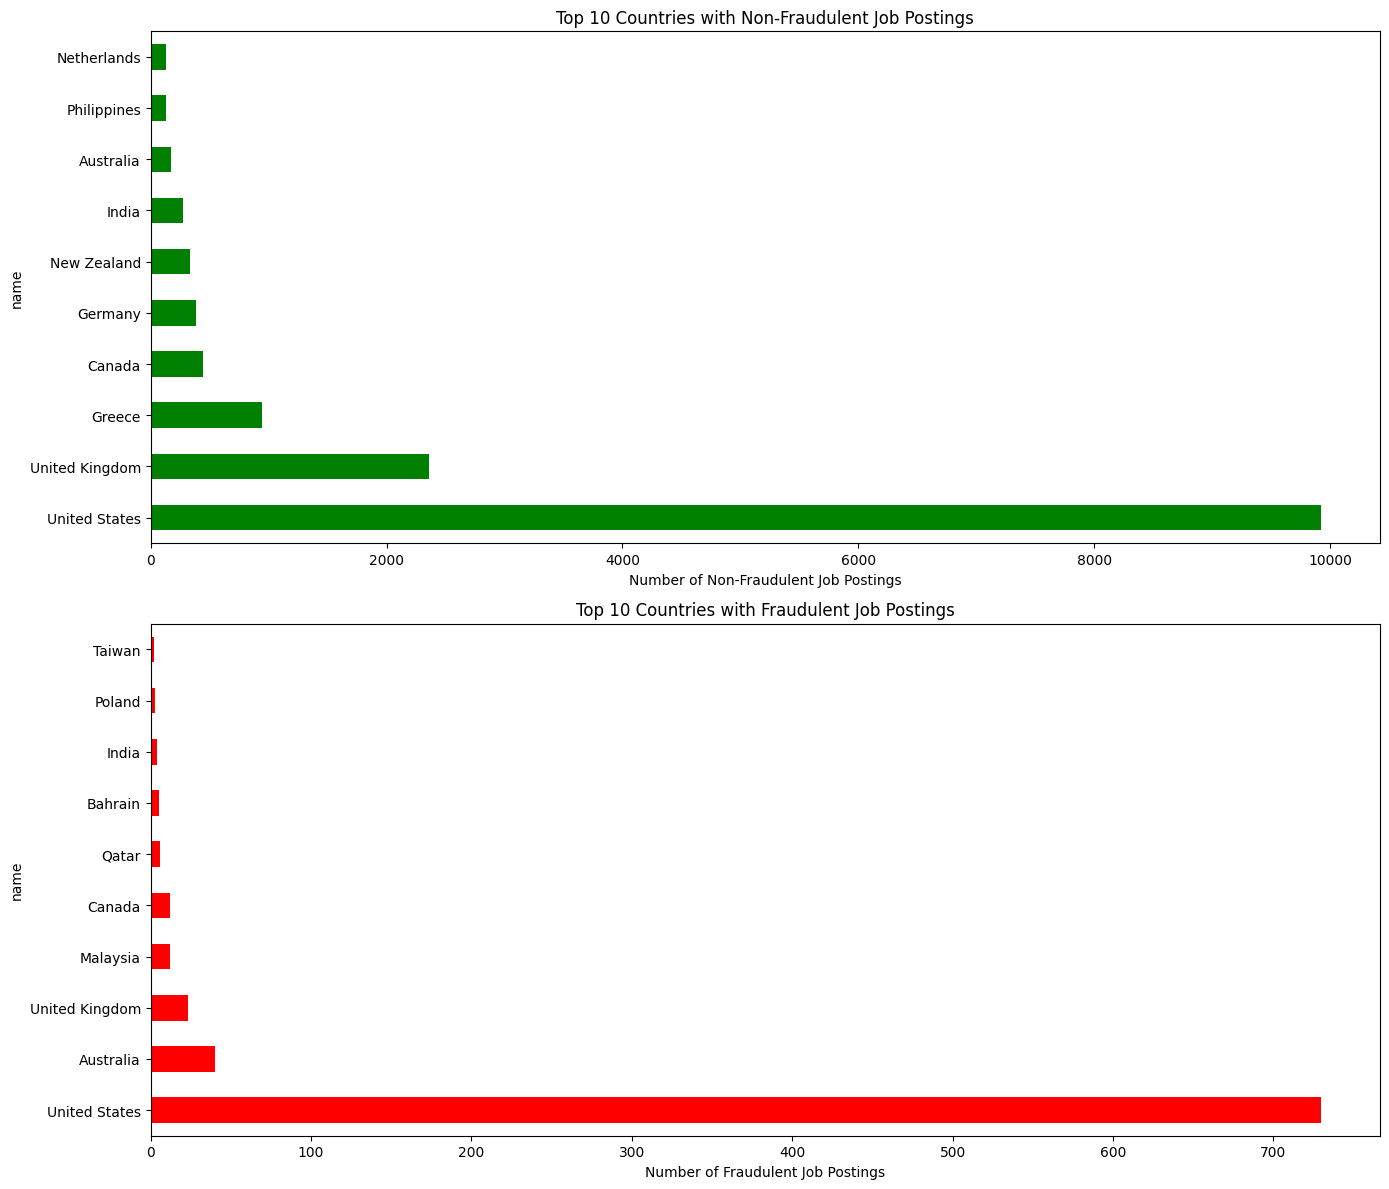

In [19]:
# Extracting the country code from the 'location' column in the job_data
df['country_code'] = df['location'].str.split(',').str[0]

# Count the number of job postings by country and fraudulent status
job_country_counts = df.groupby(['country_code', 'fraudulent']).size().unstack(fill_value=0)
job_country_counts = job_country_counts.rename(columns={0: 'Non-Fraudulent', 1: 'Fraudulent'})

# Merging with country_data to get the full country names
job_country_counts = job_country_counts.merge(countries_data[['country', 'name']], left_index=True, right_on='country', how='left')

# Dropping rows with NaN values (those countries which might not be in the country dataset)
job_country_counts.dropna(inplace=True)

# Plotting the data
fig, ax = plt.subplots(2, 1, figsize=(14, 12))
job_country_counts.sort_values(by='Non-Fraudulent', ascending=False).set_index('name')['Non-Fraudulent'].head(10).plot(kind='barh', ax=ax[0], color='green')
ax[0].set_title('Top 10 Countries with Non-Fraudulent Job Postings')
ax[0].set_xlabel('Number of Non-Fraudulent Job Postings')

job_country_counts.sort_values(by='Fraudulent', ascending=False).set_index('name')['Fraudulent'].head(10).plot(kind='barh', ax=ax[1], color='red')
ax[1].set_title('Top 10 Countries with Fraudulent Job Postings')
ax[1].set_xlabel('Number of Fraudulent Job Postings')

plt.tight_layout()
plt.show()


In [20]:
# Merging country coordinates for plotting
map_data = job_country_counts.merge(countries_data[['country', 'latitude', 'longitude']], on='country', how='left')

# Create a map centered around an average location
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Iterate through the rows of your data frame
for idx, row in map_data.iterrows():
    # Check and plot non-fraudulent postings if their count is greater than zero
    if row['Non-Fraudulent'] > 0:
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=np.sqrt(row['Non-Fraudulent']) * 0.5,  # Adjust scaling factor as needed
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.6,
            tooltip=f"Non-Fraudulent: {row['Non-Fraudulent']}"  # Tooltip for hover effect
        ).add_to(world_map)

    # Check and plot fraudulent postings if their count is greater than zero
    if row['Fraudulent'] > 0:
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=np.sqrt(row['Fraudulent']) * 0.5,  # Adjust scaling factor as needed
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            tooltip=f"Fraudulent: {row['Fraudulent']}"  # Tooltip for hover effect
        ).add_to(world_map)

legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: 100px;
     border:3px solid grey; background-color: rgba(255, 255, 255, 0.8); z-index:9999; font-size:14px;
     padding: 10px;
     ">
     &nbsp; <b>Job Posting Types</b> <br>
     &nbsp; <span style="color:green;">●</span> Green: Non-Fraudulent <br>
     &nbsp; <span style="color:red;">●</span> Red: Fraudulent
     </div>
'''
world_map.get_root().html.add_child(folium.Element(legend_html))

# Display the map
world_map

## Text Cleaning and Preprocessing Function

In [21]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Cleaning function
def clean_text(text):
    # 1. Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove 'url_' patterns (followed by any combination of letters and digits)
    text = re.sub(r'\burl_\w+\b', '', text)

    # 4. Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # 5. Remove numerical values
    text = re.sub(r'\d+', '', text)

    # 6. Convert to lowercase (case normalization)
    text = text.lower()

    # 7. Tokenize the text
    tokens = word_tokenize(text)

    # 8. Remove stop words and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and not word.startswith("url_")]

    # Return cleaned text as string
    return ' '.join(cleaned_tokens)

## Word Clouds for Real and Fake Job Postings

In [22]:
# Creating a new dataFrame with two columns ('combined_categorical' ,'fraudulent')
categorical_columns = df.select_dtypes(include=['object']).columns
new_df = pd.DataFrame()

# Merging all categorical columns into a single column
new_df['combined_categorical'] = df[categorical_columns].apply(lambda x: ' '.join(x.dropna()), axis=1)

# Adding the target column 'fraudulent'
new_df['fraudulent'] = df['fraudulent']

new_df.head()

,combined_categorical,fraudulent
0,"Marketing Intern US, NY, New York Marketing ...",0
1,"Customer Service - Cloud Video Production NZ, ...",0
2,"Commissioning Machinery Assistant (CMA) US, IA...",0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,"Bill Review Manager US, FL, Fort Worth Spo...",0


In [23]:
# Apply the cleaning function to the 'combined_categorical' column
new_df['cleaned_combined'] = new_df['combined_categorical'].apply(lambda x: clean_text(x))

# Display the first few rows of the cleaned data
new_df.head()

C:\Users\knssn\AppData\Local\Temp\ipykernel_15744\2363770212.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,combined_categorical,fraudulent,cleaned_combined
0,"Marketing Intern US, NY, New York Marketing ...",0,marketing intern u ny new york marketing food ...
1,"Customer Service - Cloud Video Production NZ, ...",0,customer service cloud video production nz auc...
2,"Commissioning Machinery Assistant (CMA) US, IA...",0,commissioning machinery assistant cma u ia wev...
3,"Account Executive - Washington DC US, DC, Wash...",0,account executive washington dc u dc washingto...
4,"Bill Review Manager US, FL, Fort Worth Spo...",0,bill review manager u fl fort worth spotsource...


In [24]:
new_df['combined_categorical'][1]

"Customer Service - Cloud Video Production NZ, , Auckland Success   90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest 

In [25]:
new_df['cleaned_combined'][1]

'customer service cloud video production nz auckland success second world cloud video production service second world cloud video production service enabling brand agency get high quality online video content shot produced anywhere world second make video production fast affordable managed seamlessly cloud purchase publish second remove hassle cost risk speed issue working regular video production company managing every aspect video project beautiful online experience growing global network rated video professional country managed dedicated production success team country second provides success guarantee second produced almost video country global brand including world largest including paypal loreal sony barclays office auckland london sydney tokyo singapore organised focused vibrant awesomedo passion customer service slick typing skill maybe account management think administration cooler polar bear jetski need hear cloud video production service opperating glodal level yeah pretty c

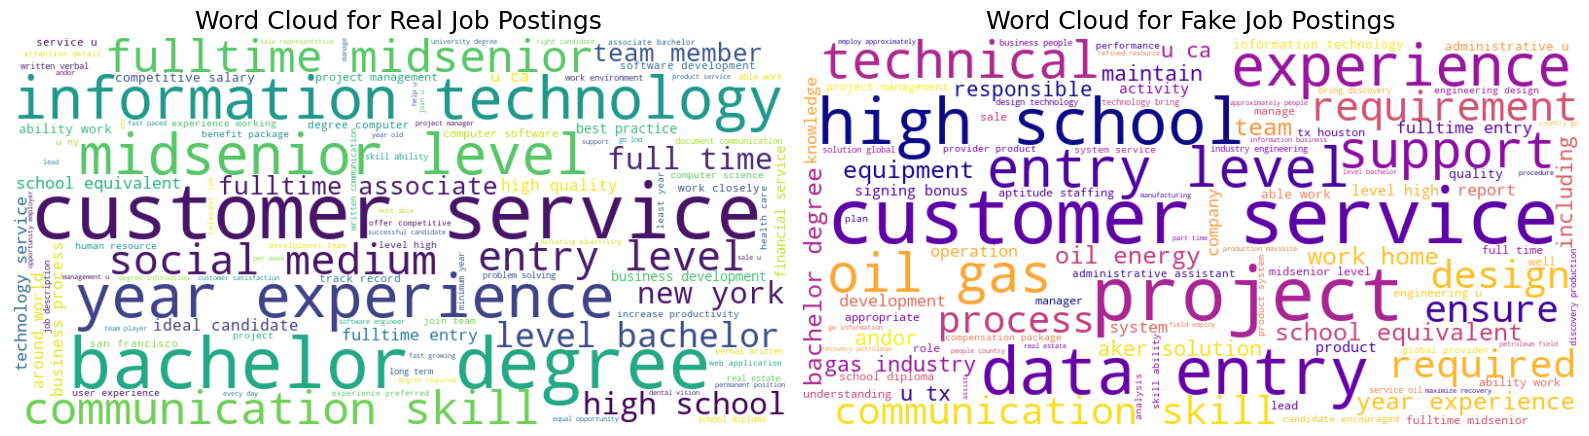

In [26]:
# Generate text strings for real and fake job postings
real_text = ' '.join(new_df[new_df['fraudulent'] == 0]['cleaned_combined'].dropna().str.lower())
fake_text = ' '.join(new_df[new_df['fraudulent'] == 1]['cleaned_combined'].dropna().str.lower())

# Create word cloud for real job postings
real_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                           max_words=100, contour_width=3, contour_color='steelblue').generate(real_text)

# Create word cloud for fake job postings
fake_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma',
                           max_words=100, contour_width=3, contour_color='firebrick').generate(fake_text)

# Set up the figure for side-by-side word clouds
plt.figure(figsize=(16, 8))

# Plot word cloud for real job postings
plt.subplot(1, 2, 1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Real Job Postings", fontsize=18)

# Plot word cloud for fake job postings
plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Fake Job Postings", fontsize=18)

# Display the word clouds
plt.tight_layout()
plt.show()


## Top 20 Most Common Words in Real and Fake Job Postings

C:\Users\knssn\AppData\Local\Temp\ipykernel_15744\2059201412.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_real_words.values, y=top_real_words.index, palette='Blues_r')
C:\Users\knssn\AppData\Local\Temp\ipykernel_15744\2059201412.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fake_words.values, y=top_fake_words.index, palette='Reds_r')


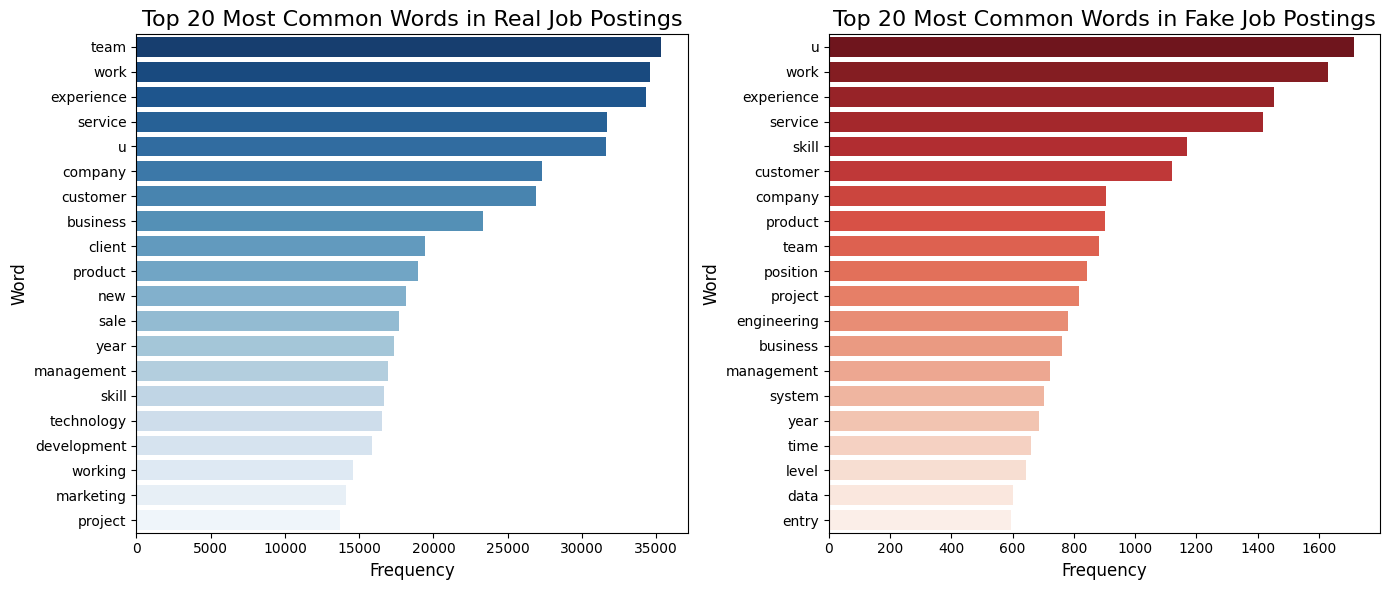

In [27]:
# Separate real and fake job postings
real_text = new_df[new_df['fraudulent'] == 0]['cleaned_combined'].str.lower().str.split().explode()
fake_text = new_df[new_df['fraudulent'] == 1]['cleaned_combined'].str.lower().str.split().explode()

# Get the top 10 most common words for real and fake job postings
top_real_words = real_text.value_counts().head(20)
top_fake_words = fake_text.value_counts().head(20)

# Set up a figure with two subplots side by side
plt.figure(figsize=(14, 6))

# Plot for most common words in real job postings
plt.subplot(1, 2, 1)
sns.barplot(x=top_real_words.values, y=top_real_words.index, palette='Blues_r')
plt.title("Top 20 Most Common Words in Real Job Postings", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)

# Plot for most common words in fake job postings
plt.subplot(1, 2, 2)
sns.barplot(x=top_fake_words.values, y=top_fake_words.index, palette='Reds_r')
plt.title("Top 20 Most Common Words in Fake Job Postings", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
